In [1]:
import geopandas as gpd
import pandas as pd
import matplotlib.patches as mpatches
from matplotlib.lines import Line2D
import seaborn as sns
import matplotlib.pyplot as plt
from adjustText import adjust_text
from matplotlib.patches import Patch

# Replace 'your_shapefile_path' with the path to your shapefile
gdf = gpd.read_file('../../../data/raw/cb_2018_us_cbsa_500k.shp')
gdf_CT = gpd.read_file('../../../data/raw/cb_2018_us_state_500k.shp')
gdf_CT_census = gpd.read_file('../../../data/raw/cb_2018_09_bg_500k.shp')
gdf_counties = gpd.read_file('../../../data/raw/cb_2018_us_county_500k.shp')
gdf_towns = gpd.read_file('../../../data/raw/Town_Polygon.shp')

# Replace 'population_csv_path' with the path to your population data CSV
population = pd.read_excel('../../../data/raw/pop_towns2022 (1).xlsx')
population = population.iloc[16:185]
population  = population.reset_index(drop=True)
population
population = population.iloc[:, :-2]
new_column_index = ['TOWN', 'Population']

# Assign the new column index directly to the columns attribute
population.columns = new_column_index

In [2]:
#merge data with population
inland_data = gdf_towns[gdf_towns['COASTP_COD'] == 1]
sorted_df = inland_data.sort_values(by='ACREAGE', ascending=False)

# Keep only the first occurrence of each town name (largest ACREAGE)
town_final = sorted_df.drop_duplicates(subset='TOWN', keep='first')
town_final  = town_final.sort_values(by='TOWN')
town_final.reset_index(drop=True, inplace=True)
town_final['TOWN'] = town_final['TOWN'].str.upper()
merged_data = pd.merge(town_final, population, how="left", left_on="TOWN", right_on="TOWN")

In [3]:
COLCHESTER = town_final.loc[town_final['TOWN'] == 'COLCHESTER']
LYME = town_final.loc[town_final['TOWN'] == 'LYME']
OLDLYME = town_final.loc[town_final['TOWN'] == 'OLD LYME']
BRIDGEWATER = town_final.loc[town_final['TOWN'] == 'BRIDGEWATER']
NEWMILFORD = town_final.loc[town_final['TOWN'] == 'NEW MILFORD']

In [4]:
CT_result = gdf_CT[gdf_CT['STUSPS'] == 'CT']
result = gdf[gdf['NAME'].str.contains('CT')]

In [5]:
CT_result = gdf_CT[gdf_CT['STUSPS'] == 'CT']
result = gdf[gdf['NAME'].str.contains('CT')]
result

#extract a single row out as the dataframe
HEM = result.iloc[0:1]
NHM = result.iloc[3:4]
BSN = result.iloc[4:5]

# Load population data for each MSA
NHM_population = 864751  # Replace with actual population data
HEM_population = 1213324  # Replace with actual population data
BSN_population = 956446   # Replace with actual population data

# Merge population data with the GeoDataFrames
NHM['population'] = NHM_population
HEM['population'] = HEM_population
BSN['population'] = BSN_population

C:\Users\peiyaozhao\AppData\Local\anaconda3\Lib\site-packages\geopandas\geodataframe.py:1543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
C:\Users\peiyaozhao\AppData\Local\anaconda3\Lib\site-packages\geopandas\geodataframe.py:1543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
C:\Users\peiyaozhao\AppData\Local\anaconda3\Lib\site-packages\geopandas\geodataframe.py:1543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice 

In [6]:
#set the county name and heat map for the counties
STATEFP_connecticut = '09'
gdf_connecticut_counties = gdf_counties[gdf_counties['STATEFP'] == STATEFP_connecticut]
rows_to_drop = [661, 1238,1991]
gdf_connecticut_counties.drop(index=rows_to_drop, inplace=True)
target_counties = gdf_connecticut_counties
target_counties['POPULATION'] = [898636,956446,164568,150120,898636]
target_counties

C:\Users\peiyaozhao\AppData\Local\Temp\ipykernel_11032\168835013.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gdf_connecticut_counties.drop(index=rows_to_drop, inplace=True)
C:\Users\peiyaozhao\AppData\Local\anaconda3\Lib\site-packages\geopandas\geodataframe.py:1543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


,STATEFP,COUNTYFP,COUNTYNS,AFFGEOID,GEOID,NAME,LSAD,ALAND,AWATER,geometry,POPULATION
56,09,009,00212798,0500000US09009,09009,New Haven,06,1565688367,667081242,"MULTIPOLYGON (((-72.76143 41.24233, -72.75973 ...",898636
659,09,001,00212794,0500000US09001,09001,Fairfield,06,1618651428,549293518,"MULTIPOLYGON (((-73.21717 41.14391, -73.21611 ...",956446
660,09,007,00212797,0500000US09007,09007,Middlesex,06,956493754,180679140,"POLYGON ((-72.75294 41.59250, -72.74284 41.594...",164568
1239,09,013,00212668,0500000US09013,09013,Tolland,06,1062807467,17549693,"POLYGON ((-72.51733 41.86990, -72.51692 41.873...",150120
2003,09,003,00212338,0500000US09003,09003,Hartford,06,1903543897,40543777,"POLYGON ((-73.02054 42.00009, -73.00876 42.038...",898636


In [7]:
merged_data

,OBJECTID,TBPOLY_COD,TOWN_POLY,AV_LEGEND,IMS_LEGEND,COASTP_COD,COAST_POLY,STATE_COD,FIPS_COD,TOWN_NO,TOWN,CNTY_COD,COUNTY,ACREAGE,AREA_SQMI,SHAPE_Leng,SHAPE_Area,geometry,Population
0,58,100.0,Connecticut Town,Connecticut Town,Town,1,Inland Polygons,CT,09013,1,ANDOVER,13,Tolland,10056.900391,15.713900,0.277579,0.004405,"POLYGON ((-72.41053 41.76566, -72.40643 41.765...",3150
1,150,100.0,Connecticut Town,Connecticut Town,Town,1,Inland Polygons,CT,09009,2,ANSONIA,9,New Haven,4000.110107,6.250160,0.173936,0.001742,"POLYGON ((-73.09538 41.35995, -73.09521 41.360...",18923
2,19,100.0,Connecticut Town,Connecticut Town,Town,1,Inland Polygons,CT,09015,3,ASHFORD,15,Windham,25268.400391,39.481899,0.439113,0.011093,"POLYGON ((-72.21693 41.95823, -72.21310 41.958...",4222
3,44,100.0,Connecticut Town,Connecticut Town,Town,1,Inland Polygons,CT,09003,4,AVON,3,Hartford,14992.299805,23.425501,0.360636,0.006572,"POLYGON ((-72.79856 41.82497, -72.79870 41.824...",18871
4,16,100.0,Connecticut Town,Connecticut Town,Town,1,Inland Polygons,CT,09005,5,BARKHAMSTED,5,Litchfield,24775.300781,38.711498,0.447544,0.010883,"POLYGON ((-73.02948 41.96662, -73.02524 41.966...",3667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
164,22,100.0,Connecticut Town,Connecticut Town,Town,1,Inland Polygons,CT,09003,165,WINDSOR LOCKS,3,Hartford,5976.390137,9.338110,0.227728,0.002625,"POLYGON ((-72.68763 41.94821, -72.67428 41.947...",12537
165,89,100.0,Connecticut Town,Connecticut Town,Town,1,Inland Polygons,CT,09009,166,WOLCOTT,9,New Haven,13539.400391,21.155300,0.298622,0.005918,"POLYGON ((-72.93826 41.64412, -72.93800 41.640...",16190
166,138,100.0,Connecticut Town,Connecticut Town,Town,1,Inland Polygons,CT,09009,167,WOODBRIDGE,9,New Haven,12283.900391,19.193600,0.328308,0.005349,"POLYGON ((-73.04760 41.39592, -73.04758 41.395...",9051
167,94,100.0,Connecticut Town,Connecticut Town,Town,1,Inland Polygons,CT,09005,168,WOODBURY,5,Litchfield,23514.800781,36.741901,0.421755,0.010272,"POLYGON ((-73.25351 41.60456, -73.24956 41.604...",9802


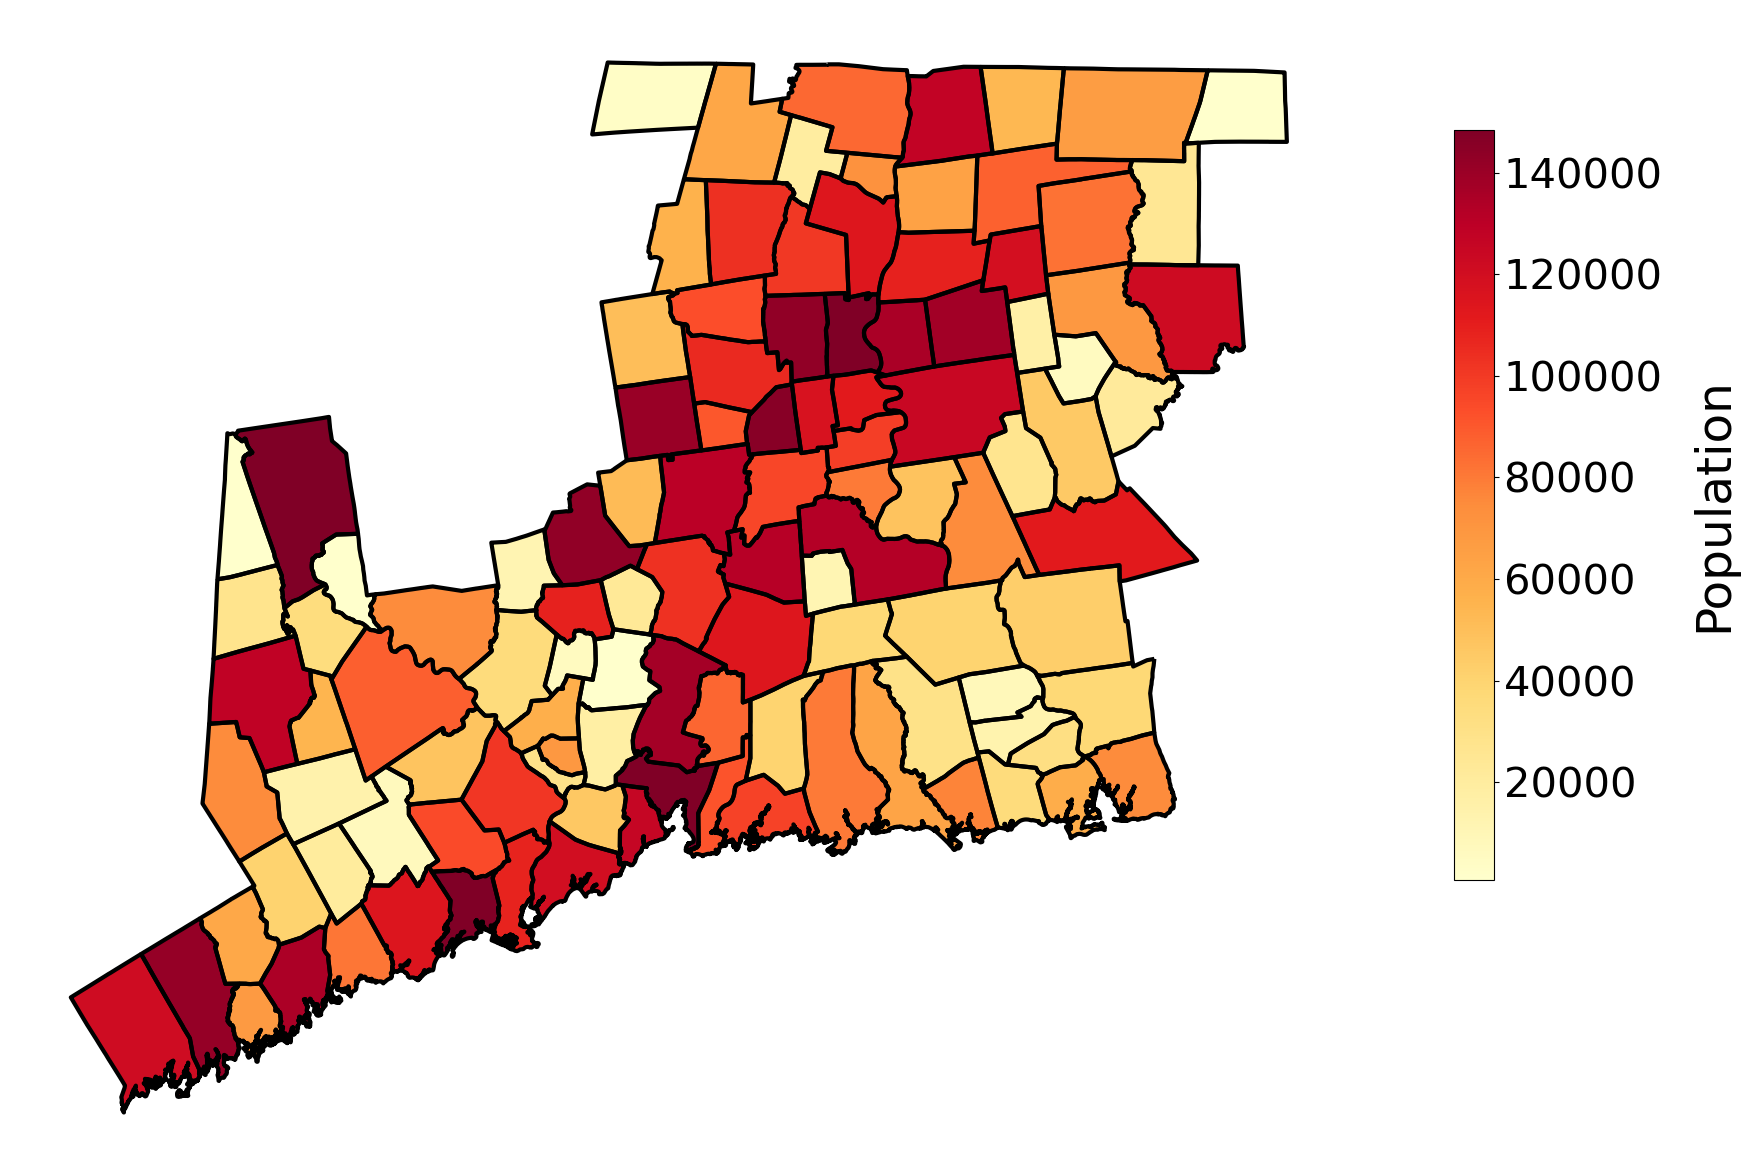

In [8]:
# Additional towns to include
towns =merged_data
additional_towns = ['NEW MILFORD', 'BRIDGEWATER', 'LYME', 'OLD LYME', 'COLCHESTER']

# Create GeoDataFrame for additional towns
additional_towns_gdf = towns[towns['TOWN'].str.upper().isin(additional_towns)]

# Concatenate additional towns GeoDataFrame with existing towns GeoDataFrame
towns_gdf = pd.concat([towns, additional_towns_gdf], ignore_index=True)

# Define county to MSA mappings
county_to_msa = {
    'New Haven': 'New Haven MSA',
    'Fairfield': 'Bridgeport MSA',
    'Hartford': 'Hartford MSA',
    'Tolland': 'Hartford MSA',
    'Middlesex': 'Hartford MSA'
}

# Create separate GeoDataFrames for each county
county_gdfs = {}
for county, msa in county_to_msa.items():
    county_gdfs[county] = towns_gdf[towns_gdf['COUNTY'] == county]

# Combine towns in each county into MSAs
msa_gdfs = {}
for county, msa in county_to_msa.items():
    if msa not in msa_gdfs:
        msa_gdfs[msa] = county_gdfs[county]
    else:
        msa_gdfs[msa] = gpd.GeoDataFrame(pd.concat([msa_gdfs[msa], county_gdfs[county]], ignore_index=True))

# Plot all MSAs and additional towns on the same map with heatmap
fig, ax = plt.subplots(figsize=(20, 15))
# Remove frame and ticks
ax.axis('off')

# Plot the heatmap for each MSA
for msa, gdf in msa_gdfs.items():
    gdf.plot(column='Population', cmap='YlOrRd', linewidth=0.8, ax=ax, edgecolor='lightgray')  # Plot heatmap
    gdf.boundary.plot(ax=ax, linewidth=3, color='black')  # Plot the boundary of each MSA

# Add additional towns to the heatmap
additional_towns_gdf.plot(column='Population', cmap='YlOrRd', ax=ax, markersize=50)
# Plot boundaries for additional towns
additional_towns_gdf.boundary.plot(ax=ax, linewidth=3, color='black')

# Add a colorbar
cax = fig.add_axes([0.9, 0.3, 0.02, 0.5])
sm = plt.cm.ScalarMappable(cmap='YlOrRd', norm=plt.Normalize(vmin=towns_gdf['Population'].min(), vmax=towns_gdf['Population'].max()))
sm._A = []
colorbar = fig.colorbar(sm, cax=cax)
colorbar.set_label('Population', labelpad=20, fontsize=35)  
colorbar.ax.tick_params(axis='y', labelsize=30)  
plt.savefig('../../../figures/Report-images/heatmap-CT-population.png',dpi=600, bbox_inches='tight')

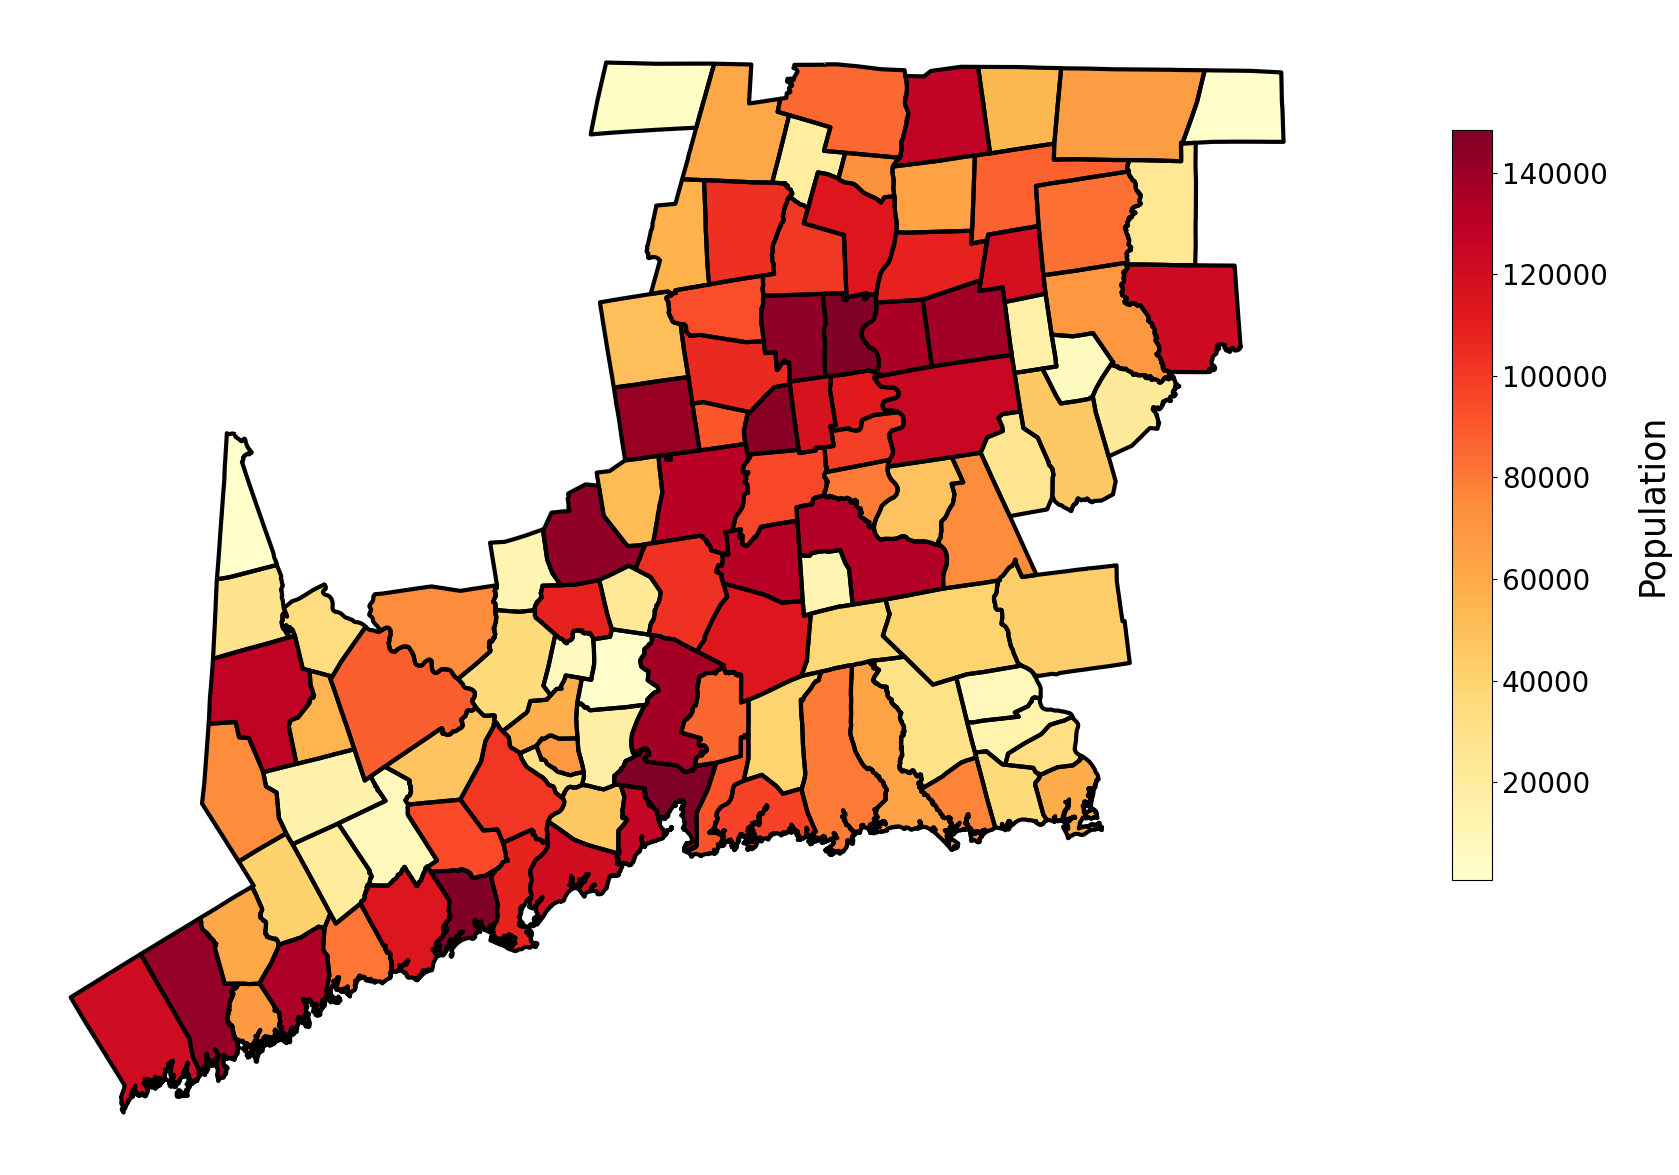

In [9]:
#extra town not included
ax.set_axis_off()

# Load the shapefile for the towns in Connecticut
towns = merged_data


# Define county to MSA mappings
county_to_msa = {
    'New Haven': 'New Haven MSA',
    'Fairfield': 'Bridgeport MSA',
    'Hartford': 'Hartford MSA',
    'Tolland': 'Hartford MSA',
    'Middlesex': 'Hartford MSA'
}

# Create separate GeoDataFrames for each county
county_gdfs = {}
for county, msa in county_to_msa.items():
    county_gdfs[county] = towns[towns['COUNTY'] == county]

# Combine towns in each county into MSAs
msa_gdfs = {}
for county, msa in county_to_msa.items():
    if msa not in msa_gdfs:
        msa_gdfs[msa] = county_gdfs[county]
    else:
        msa_gdfs[msa] = gpd.GeoDataFrame(pd.concat([msa_gdfs[msa], county_gdfs[county]], ignore_index=True))

# Plot all MSAs on the same map with heatmap
fig, ax = plt.subplots(figsize=(20, 15))
# Remove frame and ticks
ax.axis('off')

# Plot the heatmap for each MSA
for msa, gdf in msa_gdfs.items():
    gdf.plot(column='Population', cmap='YlOrRd', linewidth=0.8, ax=ax, edgecolor='lightgray')  # Plot heatmap
    gdf.boundary.plot(ax=ax, linewidth=3, color='black')  # Plot the boundary of each MSA

# Add a colorbar
cax = fig.add_axes([0.9, 0.3, 0.02, 0.5])
sm = plt.cm.ScalarMappable(cmap='YlOrRd', norm=plt.Normalize(vmin=merged_data['Population'].min(), vmax=merged_data['Population'].max()))
sm._A = []
colorbar = fig.colorbar(sm, cax=cax)
colorbar.set_label('Population', labelpad=20, fontsize=25)  
colorbar.ax.tick_params(axis='y', labelsize=20)  
#plt.savefig('../../../figures/Report-images/heatmap-CT-population.png',dpi=600, bbox_inches='tight')

C:\Users\peiyaozhao\AppData\Local\Temp\ipykernel_11032\776248662.py:10: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  for x, y, label in zip(merged_data.geometry.centroid.x, merged_data.geometry.centroid.y, merged_data['TOWN']):


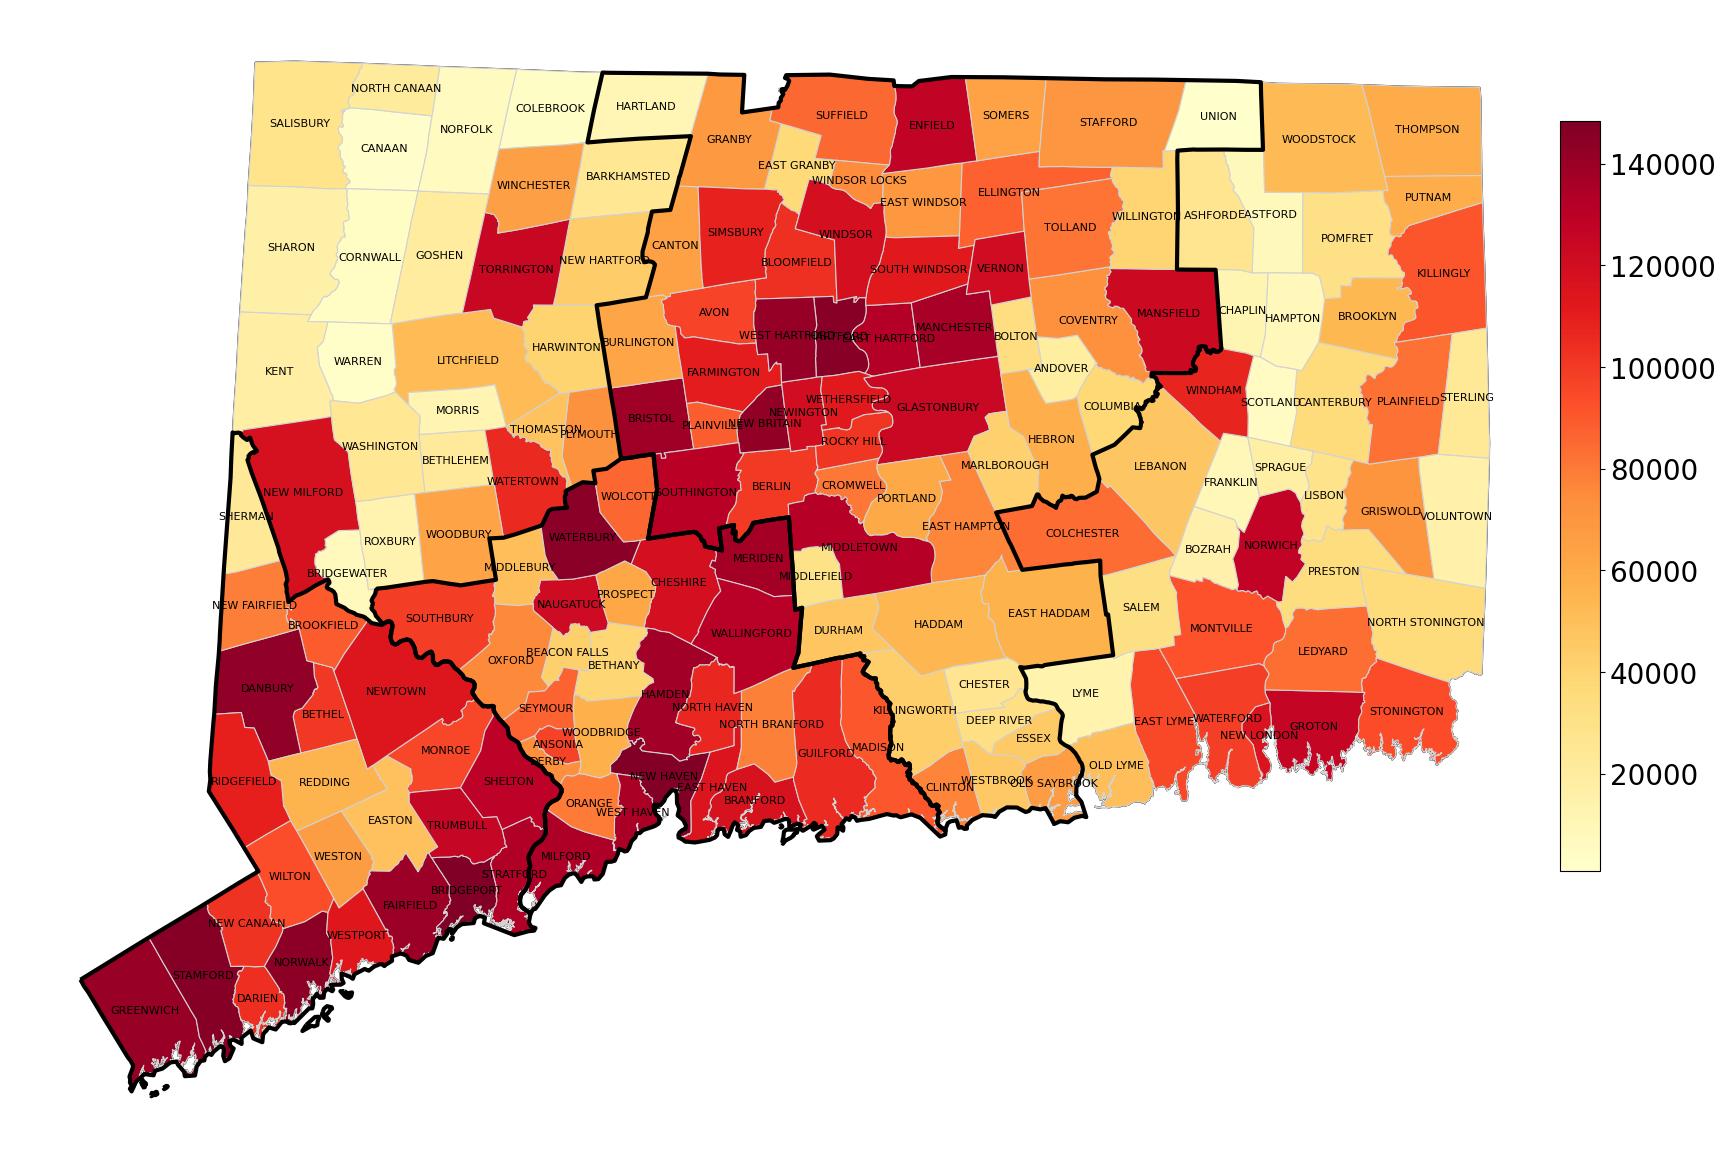

In [10]:
# Plot the heatmap with town boundaries
fig, ax = plt.subplots(1, 1, figsize=(20, 15))
ax.set_axis_off()
town_final.plot(ax=ax, color='white', edgecolor='black')  # Plot town boundaries

# Plot the heatmap with adjusted boundary color
merged_data.plot(column='Population', cmap='YlOrRd', linewidth=0.8, ax=ax, edgecolor='lightgray')  # Plot heatmap

# Annotate with town labels
for x, y, label in zip(merged_data.geometry.centroid.x, merged_data.geometry.centroid.y, merged_data['TOWN']):
    ax.text(x, y, label, fontsize=8, ha='center', va='center', color='black')
    
# Plot the New Haven-Milford MSA and fill it with a color matching the heatmap
NHM.boundary.plot(ax=ax, linewidth=3, color='black')  # Choose a color from the YlOrRd colormap
#NHM.plot(ax=ax, facecolor='darkorange', alpha=0.5)

# Plot the Hartford-East Hartford-Middletown MSA, fill it with a color matching the heatmap
HEM.boundary.plot(ax=ax, linewidth=3, color='black')  # Choose a color from the YlOrRd colormap
#HEM.plot(ax=ax, facecolor='darkorange', alpha=0.5)

# Plot the Bridgeport-Stamford-Norwalk MSA, fill it with a color matching the heatmap
BSN.boundary.plot(ax=ax, linewidth=3, color='black')  # Choose a color from the YlOrRd colormap
#BSN.plot(ax=ax, facecolor='darkorange', alpha=0.5)

# Add colorbar
cax = fig.add_axes([0.9, 0.3, 0.02, 0.5])
sm = plt.cm.ScalarMappable(cmap='YlOrRd', norm=plt.Normalize(vmin=merged_data['Population'].min(), vmax=merged_data['Population'].max()))
sm._A = []
colorbar = fig.colorbar(sm, cax=cax)

colorbar.ax.tick_params(labelsize=20)

#plt.show()
plt.savefig('../../../figures/Report-images/heatmap-CT-population.png',dpi=600, bbox_inches='tight')

C:\Users\peiyaozhao\AppData\Local\Temp\ipykernel_11032\3627930451.py:20: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  for x, y, label in zip(merged_data.geometry.centroid.x, merged_data.geometry.centroid.y, merged_data['TOWN']):


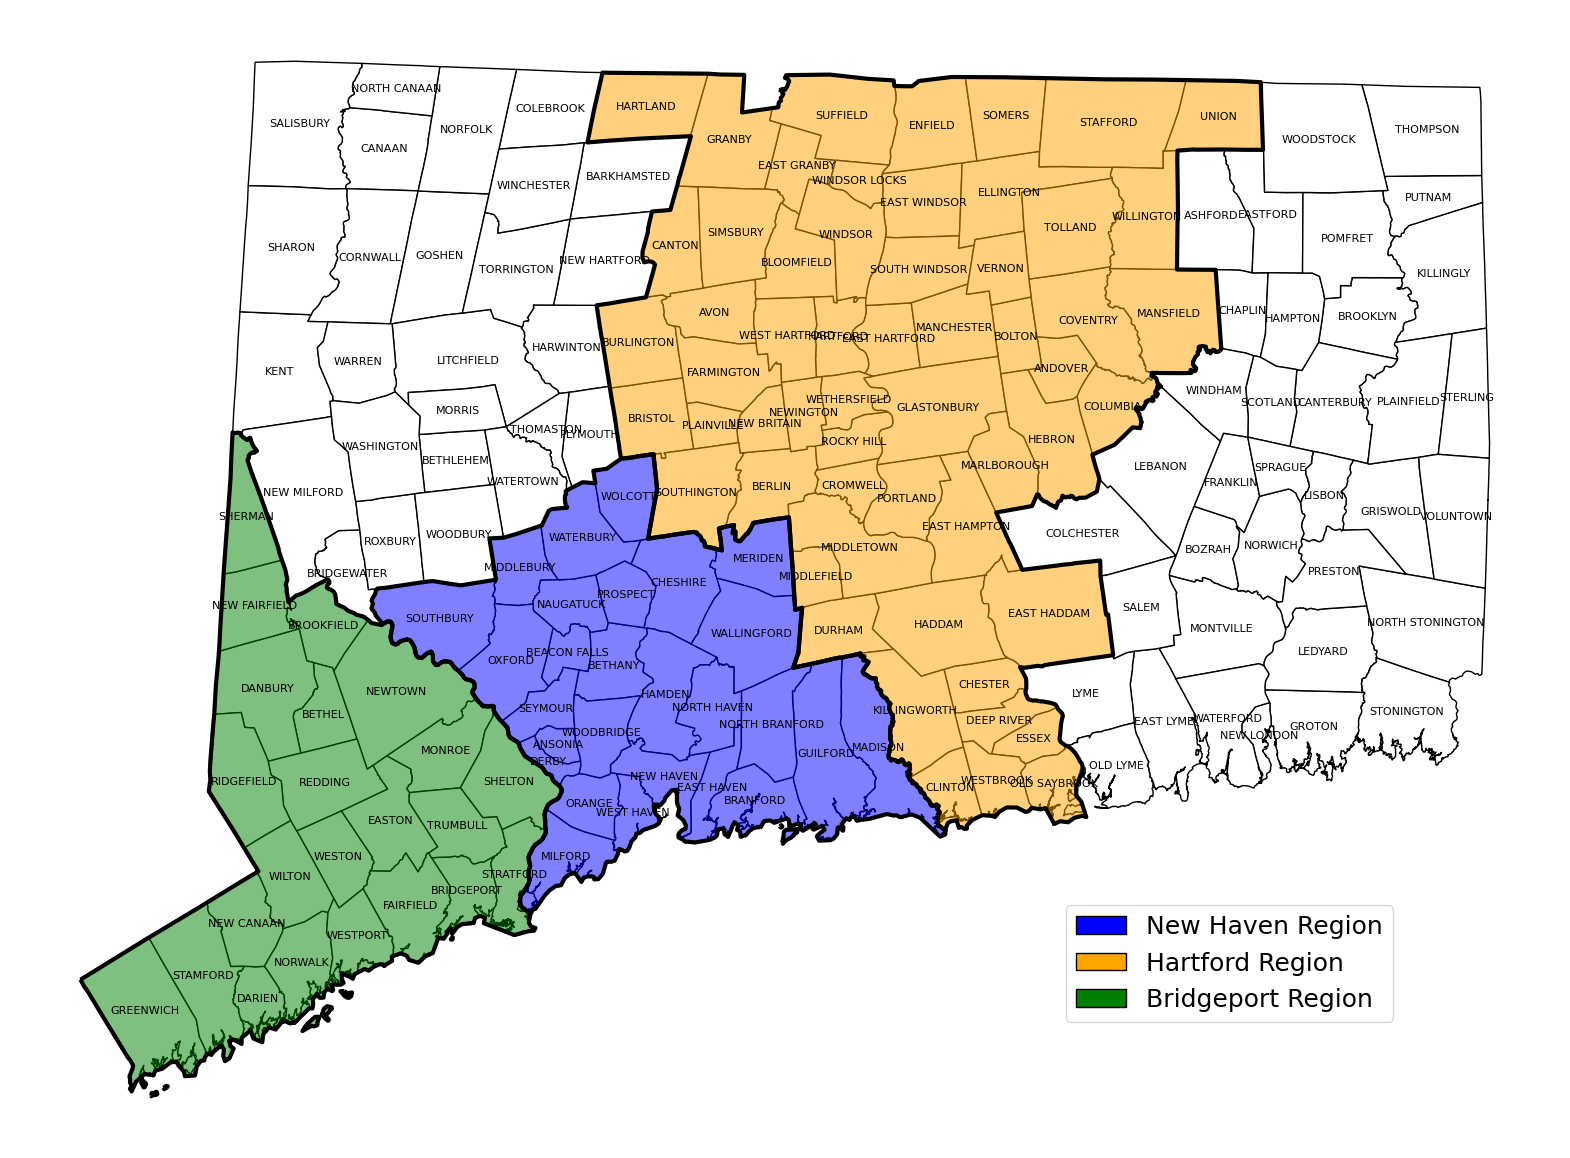

In [11]:
# Plot the heatmap with town boundaries
fig, ax = plt.subplots(1, 1, figsize=(20, 15))
ax.set_axis_off()
town_final.plot(ax=ax, color='white', edgecolor='black')  # Plot town boundaries

# Plot the New Haven-Milford MSA and fill it with blue color
NHM.boundary.plot(ax=ax, linewidth=3, color='black')  
NHM.plot(ax=ax, facecolor='blue', alpha=0.5, label='New Haven-Milford MSA')  # Blue color for New Haven-Milford MSA

# Plot the Hartford-East Hartford-Middletown MSA and fill it with orange color
HEM.boundary.plot(ax=ax, linewidth=3, color='black')  
HEM.plot(ax=ax, facecolor='orange', alpha=0.5, label='Hartford-East Hartford-Middletown MSA')  # Orange color for Hartford-East Hartford-Middletown MSA

# Plot the Bridgeport-Stamford-Norwalk MSA and fill it with green color
BSN.boundary.plot(ax=ax, linewidth=3, color='black')  
BSN.plot(ax=ax, facecolor='green', alpha=0.5, label='Bridgeport-Stamford-Norwalk MSA')  # Green color for Bridgeport-Stamford-Norwalk MSA


# Annotate with town labels
for x, y, label in zip(merged_data.geometry.centroid.x, merged_data.geometry.centroid.y, merged_data['TOWN']):
    ax.text(x, y, label, fontsize=8, ha='center', va='center', color='black')

# Create legend handles and labels
legend_handles = [Patch(facecolor='blue', edgecolor='black'), 
                  Patch(facecolor='orange', edgecolor='black'), 
                  Patch(facecolor='green', edgecolor='black')]
legend_labels = ['New Haven Region', 
                 'Hartford Region', 
                 'Bridgeport Region']

# Add legend with increased font size
ax.legend(handles=legend_handles, labels=legend_labels, loc='lower right', fontsize=18, bbox_to_anchor=(0.9, 0.1))



# Save the plot
plt.savefig('../../../figures/Report-images/MSA-boundary-CT.png',dpi=600, bbox_inches='tight')

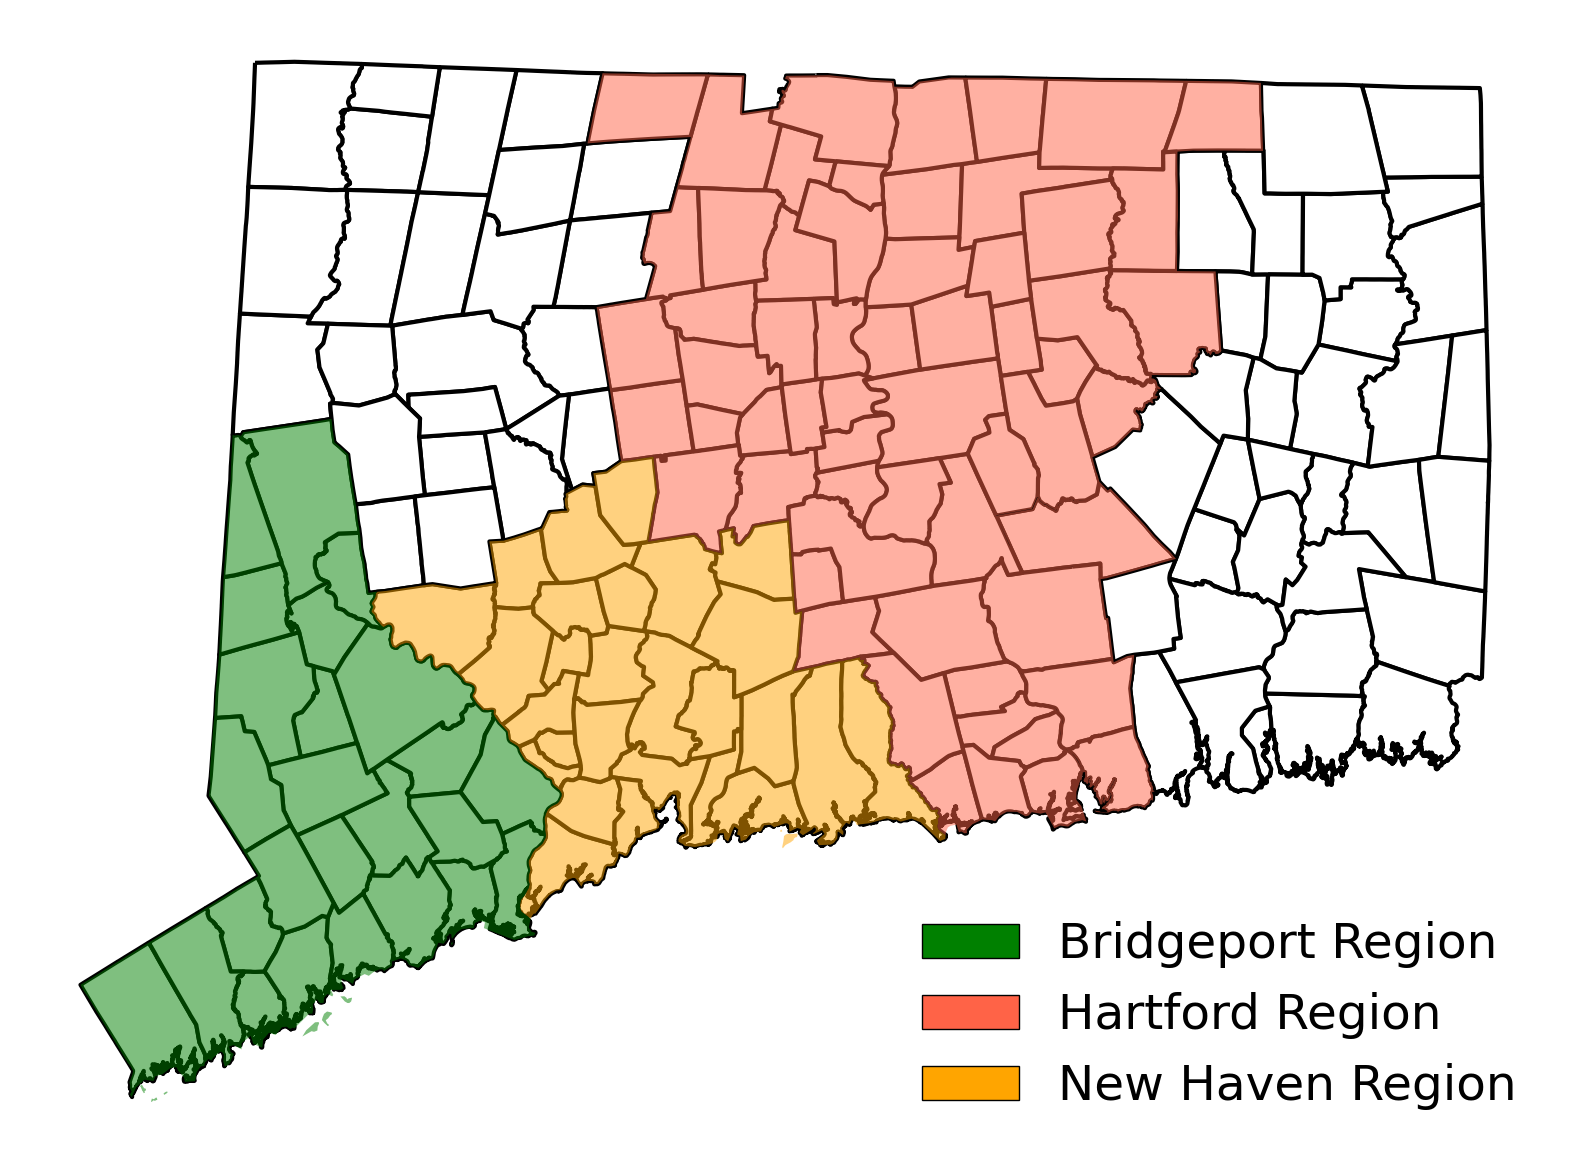

In [12]:
# Merge "New Milford" and "Bridgewater" polygons into Bridgeport-Stamford-Norwalk MSA boundary
BSN_with_towns = BSN.unary_union
BSN_with_towns = BSN_with_towns.union(town_final[town_final['TOWN'].isin(['NEW MILFORD', 'BRIDGEWATER'])].unary_union)

# Merge "New Milford" and "Bridgewater" polygons into Bridgeport-Stamford-Norwalk MSA boundary
HEM_with_towns = HEM.unary_union
HEM_with_towns = HEM_with_towns.union(town_final[town_final['TOWN'].isin(['COLCHESTER', 'LYME','OLD LYME'])].unary_union)

# Plot the heatmap with town boundaries
fig, ax = plt.subplots(1, 1, figsize=(20, 15))
ax.set_axis_off()
town_final.plot(ax=ax, color='white', edgecolor='black', linewidth=3)  # Plot town boundaries

# Plot the New Haven-Milford MSA and fill it with blue color
#NHM.boundary.plot(ax=ax, linewidth=3, color='black')  
NHM.plot(ax=ax, facecolor='orange', alpha=0.5, label='New Haven-Milford MSA')  # Blue color for New Haven-Milford MSA

# Plot the Hartford-East Hartford-Middletown MSA and fill it with orange color
#HEM.boundary.plot(ax=ax, linewidth=3, color='black')  
#HEM.plot(ax=ax, facecolor='orange', alpha=0.5, label='Hartford-East Hartford-Middletown MSA')  # Orange color for Hartford-East Hartford-Middletown MSA

# Plot the updated Bridgeport-Stamford-Norwalk MSA boundary with merged towns and fill it with green color
gdf_bsn_with_towns = gpd.GeoDataFrame(geometry=[BSN_with_towns], crs=BSN.crs)
gdf_bsn_with_towns.plot(ax=ax, facecolor='green', alpha=0.5, label='Bridgeport-Stamford-Norwalk MSA')  # Green color for Bridgeport-Stamford-Norwalk MSA

# Plot the updated Bridgeport-Stamford-Norwalk MSA boundary with merged towns and fill it with green color
gdf_hem_with_towns = gpd.GeoDataFrame(geometry=[HEM_with_towns], crs=HEM.crs)
gdf_hem_with_towns.plot(ax=ax, facecolor='tomato', alpha=0.5, label='Hartford-East Hartford-Middletown MSA')  # Green color for Bridgeport-Stamford-Norwalk MSA

# Annotate with town labels
#for x, y, label in zip(merged_data.geometry.centroid.x, merged_data.geometry.centroid.y, merged_data['TOWN']):
    #ax.text(x, y, label, fontsize=8, ha='center', va='center', color='black')

# Create legend handles and labels
legend_handles = [Patch(facecolor='green', edgecolor='black'), 
                  Patch(facecolor='tomato', edgecolor='black'), 
                  Patch(facecolor='orange', edgecolor='black')]
legend_labels = ['Bridgeport Region', 
                 'Hartford Region', 
                 'New Haven Region']

# Add legend with increased font size
ax.legend(handles=legend_handles, labels=legend_labels, loc='lower right', fontsize=35, bbox_to_anchor=(1, 0), frameon=False)
# Save the plot
plt.savefig('../../../figures/Report-images/MSA-boundary-CT.png', dpi=600, bbox_inches='tight')


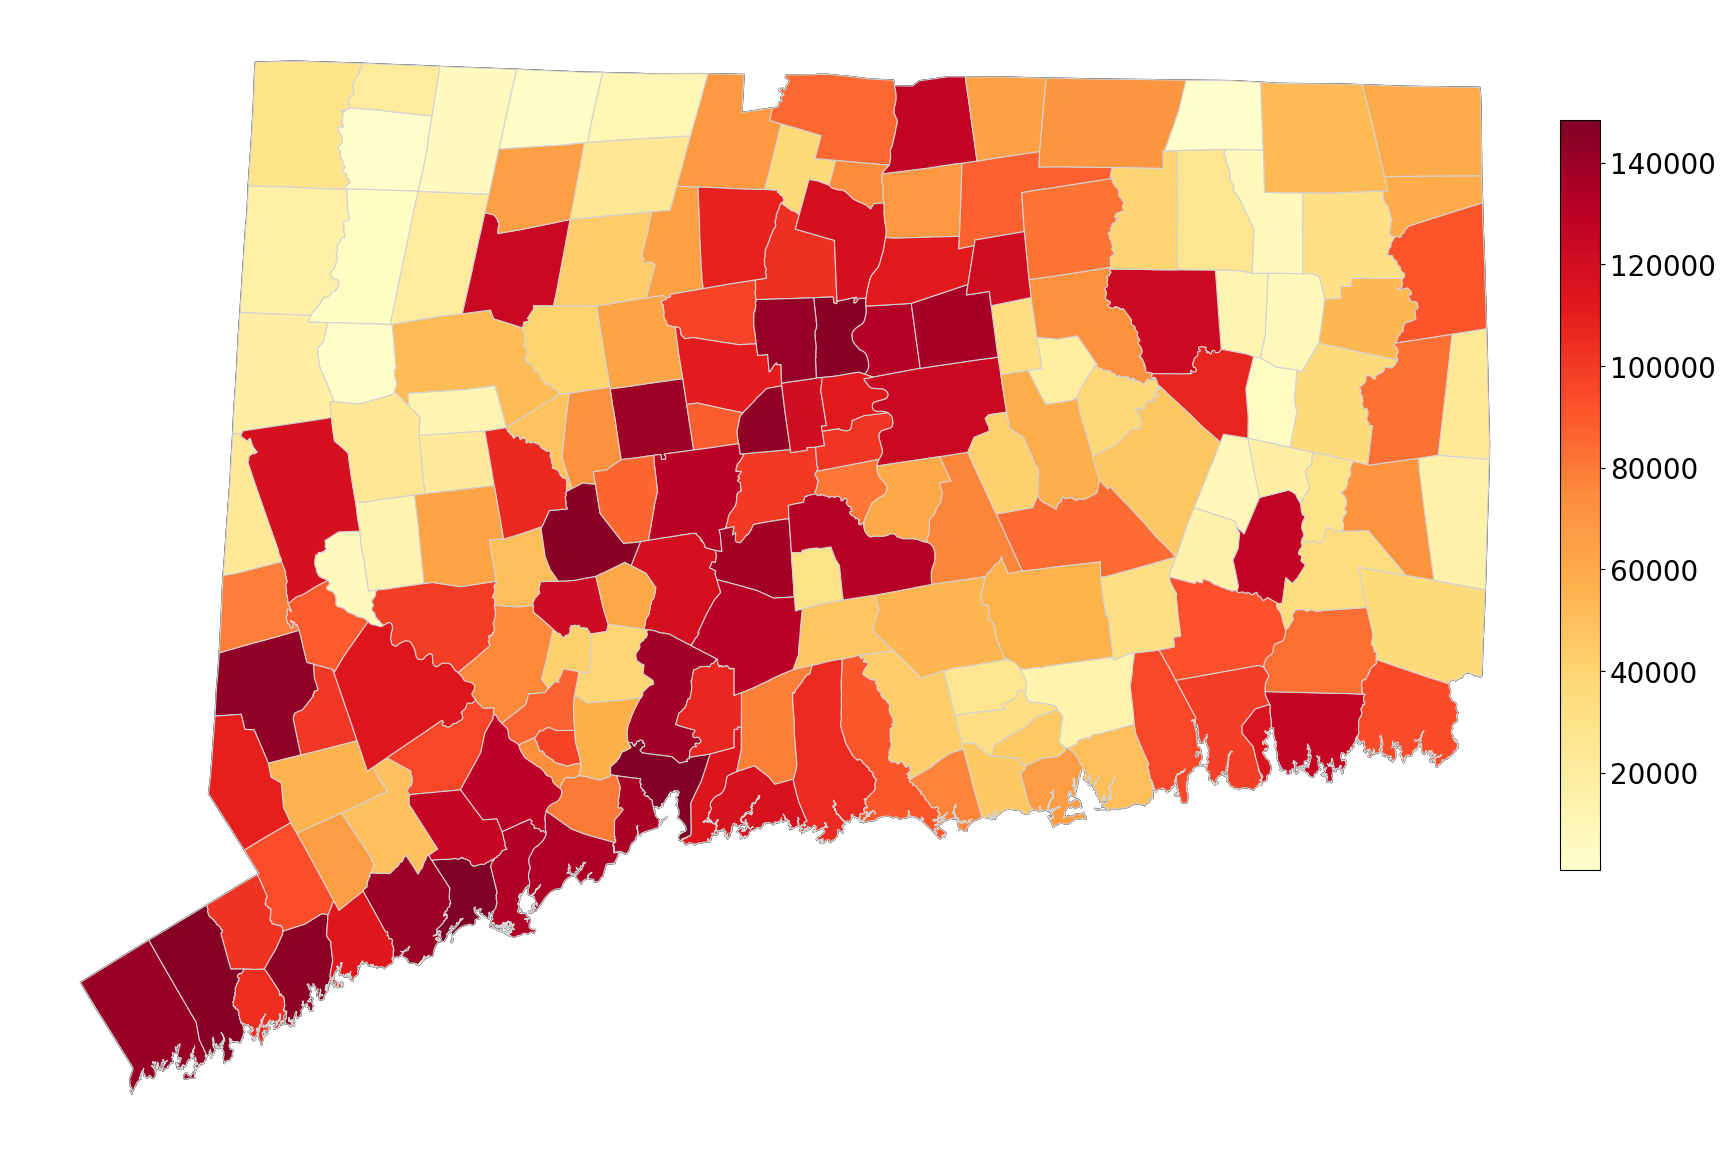

In [13]:
# Plot the heatmap with town boundaries
fig, ax = plt.subplots(1, 1, figsize=(20, 15))
ax.set_axis_off()
town_final.plot(ax=ax, color='white', edgecolor='black')  # Plot town boundaries

# Plot the heatmap with adjusted boundary color
merged_data.plot(column='Population', cmap='YlOrRd', linewidth=0.8, ax=ax, edgecolor='lightgray')  # Plot heatmap

# # Annotate with town labels
# for x, y, label in zip(merged_data.geometry.centroid.x, merged_data.geometry.centroid.y, merged_data['TOWN']):
#     ax.text(x, y, label, fontsize=8, ha='center', va='center', color='black')
    

# Add colorbar
cax = fig.add_axes([0.9, 0.3, 0.02, 0.5])
sm = plt.cm.ScalarMappable(cmap='YlOrRd', norm=plt.Normalize(vmin=merged_data['Population'].min(), vmax=merged_data['Population'].max()))
sm._A = []
colorbar = fig.colorbar(sm, cax=cax)

colorbar.ax.tick_params(labelsize=20)

#plt.show()
plt.savefig('../../../figures/Report-images/heatmap-population.png',dpi=600, bbox_inches='tight')

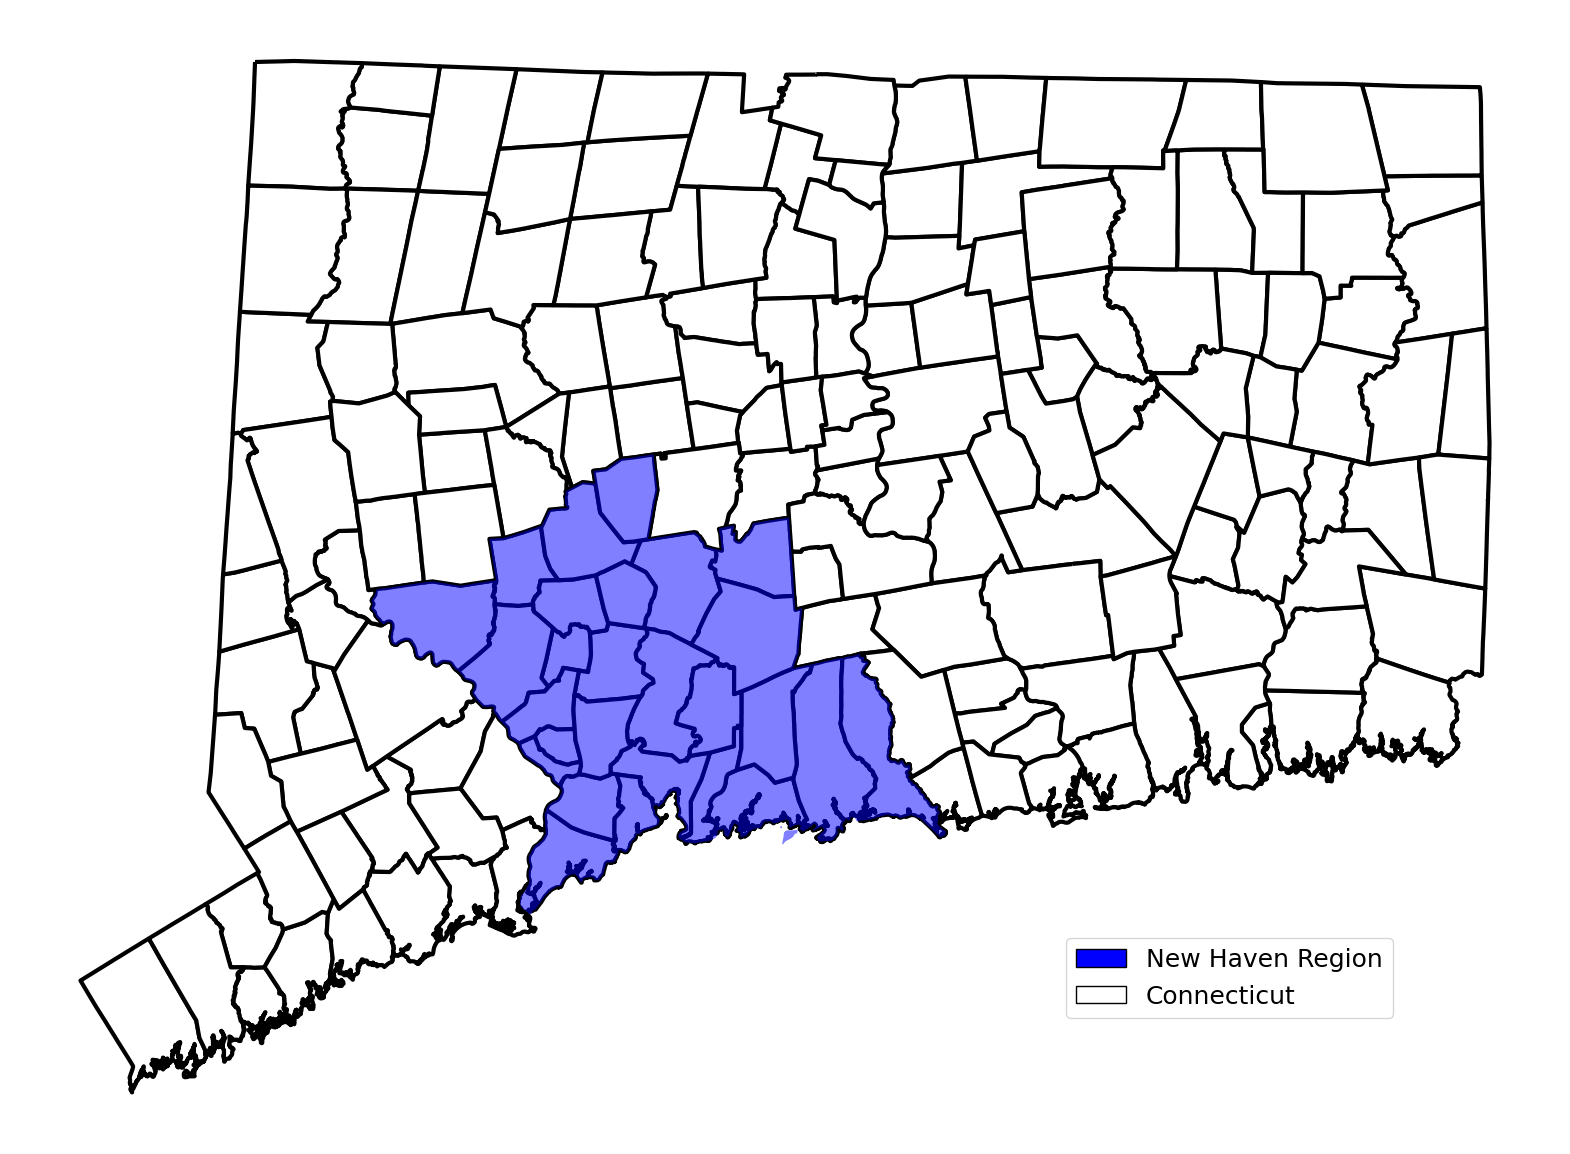

In [14]:
# Merge "New Milford" and "Bridgewater" polygons into Bridgeport-Stamford-Norwalk MSA boundary
# BSN_with_towns = BSN.unary_union
# BSN_with_towns = BSN_with_towns.union(town_final[town_final['TOWN'].isin(['NEW MILFORD', 'BRIDGEWATER'])].unary_union)

# # Merge "New Milford" and "Bridgewater" polygons into Bridgeport-Stamford-Norwalk MSA boundary
# HEM_with_towns = HEM.unary_union
# HEM_with_towns = HEM_with_towns.union(town_final[town_final['TOWN'].isin(['COLCHESTER', 'LYME','OLD LYME'])].unary_union)

# Plot the heatmap with town boundaries
fig, ax = plt.subplots(1, 1, figsize=(20, 15))
ax.set_axis_off()
town_final.plot(ax=ax, color='white', edgecolor='black', linewidth=3,label='Connecticut')  # Plot town boundaries

# Plot the New Haven-Milford MSA and fill it with blue color
#NHM.boundary.plot(ax=ax, linewidth=3, color='black')  
NHM.plot(ax=ax, facecolor='blue', alpha=0.5, label='New Haven-Milford MSA')  # Blue color for New Haven-Milford MSA

# Plot the Hartford-East Hartford-Middletown MSA and fill it with orange color
#HEM.boundary.plot(ax=ax, linewidth=3, color='black')  
#HEM.plot(ax=ax, facecolor='orange', alpha=0.5, label='Hartford-East Hartford-Middletown MSA')  # Orange color for Hartford-East Hartford-Middletown MSA

# Plot the updated Bridgeport-Stamford-Norwalk MSA boundary with merged towns and fill it with green color
# gdf_bsn_with_towns = gpd.GeoDataFrame(geometry=[BSN_with_towns], crs=BSN.crs)
# gdf_bsn_with_towns.plot(ax=ax, facecolor='green', alpha=0.5, label='Bridgeport-Stamford-Norwalk MSA')  # Green color for Bridgeport-Stamford-Norwalk MSA

# # Plot the updated Bridgeport-Stamford-Norwalk MSA boundary with merged towns and fill it with green color
# gdf_hem_with_towns = gpd.GeoDataFrame(geometry=[HEM_with_towns], crs=HEM.crs)
# gdf_hem_with_towns.plot(ax=ax, facecolor='orange', alpha=0.5, label='Hartford-East Hartford-Middletown MSA')  # Green color for Bridgeport-Stamford-Norwalk MSA

# Annotate with town labels
#for x, y, label in zip(merged_data.geometry.centroid.x, merged_data.geometry.centroid.y, merged_data['TOWN']):
    #ax.text(x, y, label, fontsize=8, ha='center', va='center', color='black')

# Create legend handles and labels
legend_handles = [Patch(facecolor='blue', edgecolor='black'), 
                  Patch(facecolor='white', edgecolor='black')]
legend_labels = ['New Haven Region', 
                 'Connecticut']

# Add legend with increased font size
ax.legend(handles=legend_handles, labels=legend_labels, loc='lower right', fontsize=18, bbox_to_anchor=(0.9, 0.1))

# Save the plot
plt.savefig('../../../figures/NewHaven.png', dpi=600, bbox_inches='tight')

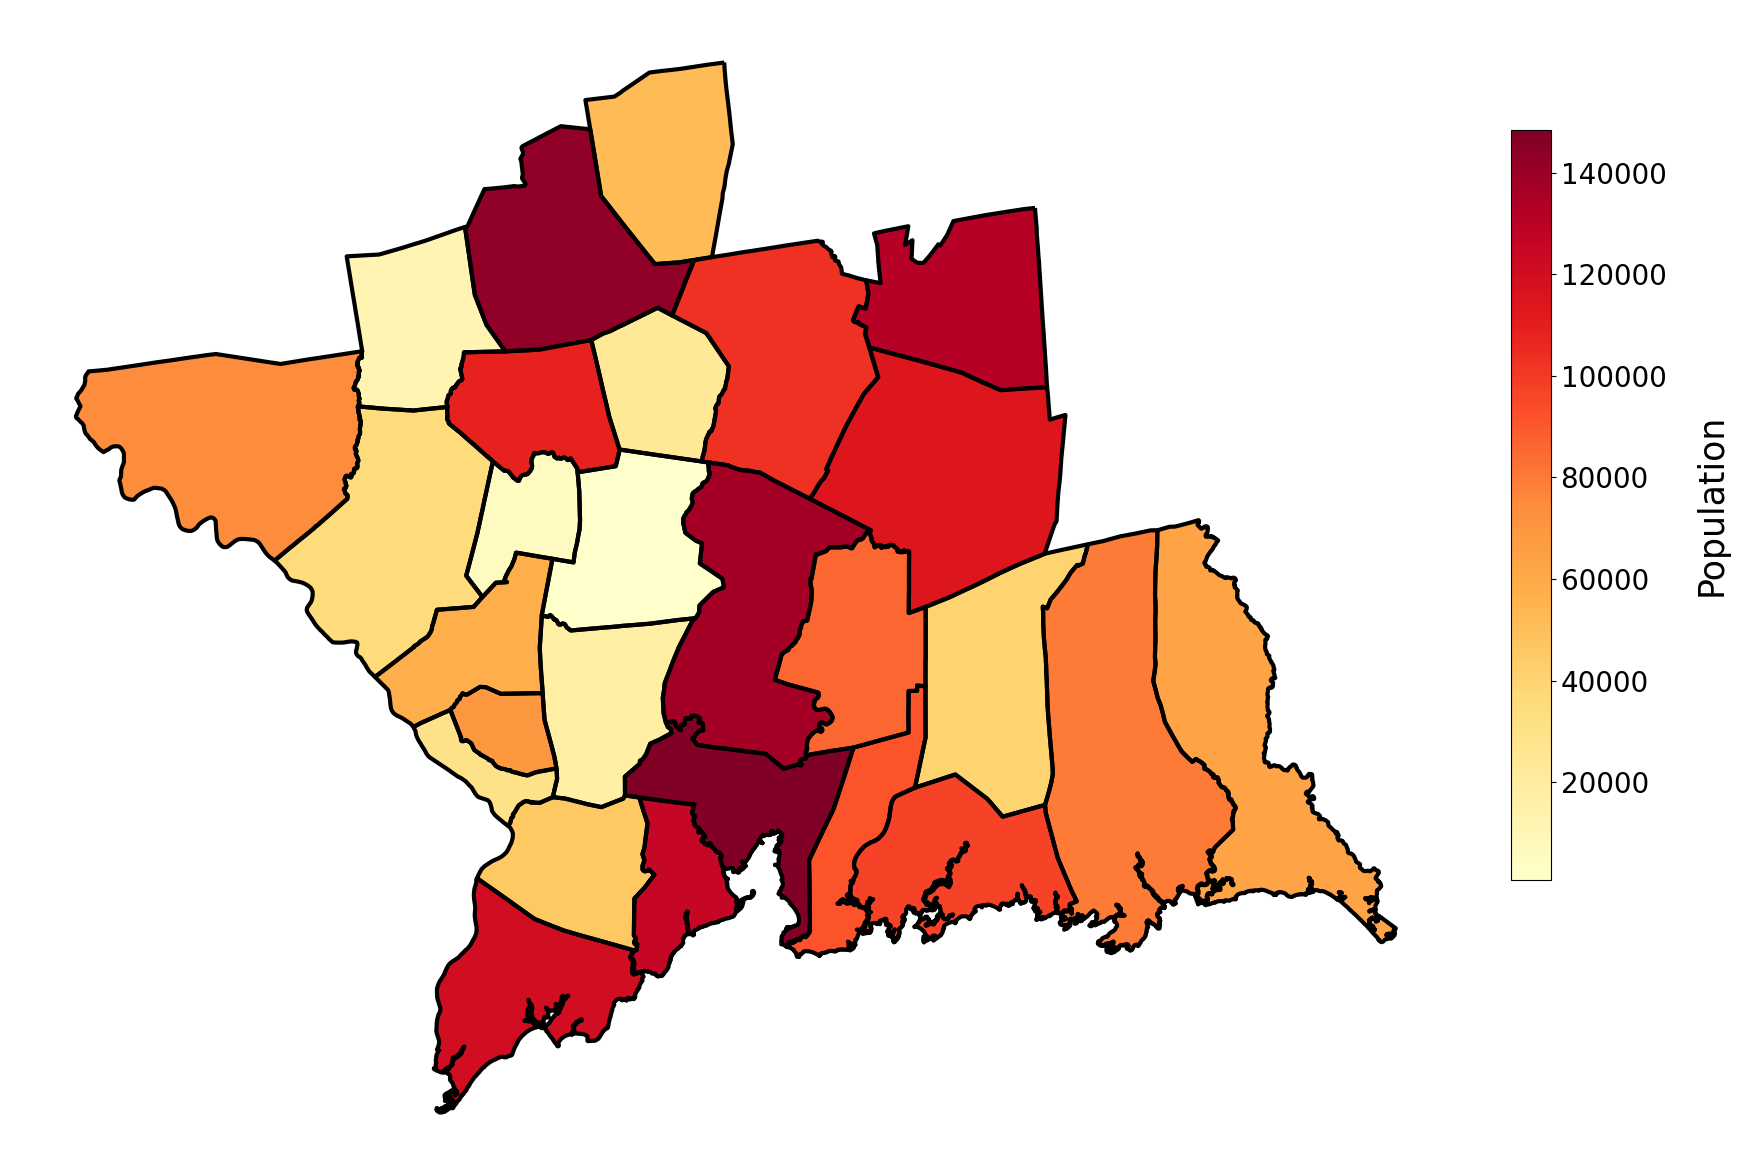

In [15]:
#extra town not included
ax.set_axis_off()

# Load the shapefile for the towns in Connecticut
towns = merged_data


# Define county to MSA mappings
county_to_msa = {
    'New Haven': 'New Haven MSA'}
# Create separate GeoDataFrames for each county
county_gdfs = {}
for county, msa in county_to_msa.items():
    county_gdfs[county] = towns[towns['COUNTY'] == county]

# Combine towns in each county into MSAs
msa_gdfs = {}
for county, msa in county_to_msa.items():
    if msa not in msa_gdfs:
        msa_gdfs[msa] = county_gdfs[county]
    else:
        msa_gdfs[msa] = gpd.GeoDataFrame(pd.concat([msa_gdfs[msa], county_gdfs[county]], ignore_index=True))

# Plot all MSAs on the same map with heatmap
fig, ax = plt.subplots(figsize=(20, 15))
# Remove frame and ticks
ax.axis('off')

# Plot the heatmap for each MSA
for msa, gdf in msa_gdfs.items():
    gdf.plot(column='Population', cmap='YlOrRd', linewidth=0.8, ax=ax, edgecolor='lightgray')  # Plot heatmap
    gdf.boundary.plot(ax=ax, linewidth=3, color='black')  # Plot the boundary of each MSA

# Add a colorbar
cax = fig.add_axes([0.9, 0.3, 0.02, 0.5])
sm = plt.cm.ScalarMappable(cmap='YlOrRd', norm=plt.Normalize(vmin=merged_data['Population'].min(), vmax=merged_data['Population'].max()))
sm._A = []
colorbar = fig.colorbar(sm, cax=cax)
colorbar.set_label('Population', labelpad=20, fontsize=25)  
colorbar.ax.tick_params(axis='y', labelsize=20)  
#plt.savefig('../../../figures/Report-images/heatmap-CT-population.png',dpi=600, bbox_inches='tight')
plt.savefig('../../../figures/NewHaven_population.png', dpi=600, bbox_inches='tight')